<a href="https://colab.research.google.com/github/snehajam/snehajam/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Dataset**

#Introduction

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The Aim is to build a profile of customers who are more likely  to buy the product.

##Attributes

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - Balance - Balance of customer

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

# Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


# Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#importing required libraries 
import pandas as pd     #Pandas is used to analyze data
import numpy as np      #library used for working with arrays
import matplotlib.pyplot as plt # data visualization and graphical plotting library 
import seaborn as sns    #data visualization library built on top of Matplotlib
from sklearn.preprocessing import LabelEncoder #importing label encoder() 
from sklearn.preprocessing import MinMaxScaler  #importing MinmaxScaler
from sklearn.feature_selection import chi2    #impoerting Chi-squared test
from sklearn.feature_selection import f_classif     #importing feature selection  
from sklearn.preprocessing import StandardScaler #importing standard scalar
from sklearn import metrics    #importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc ,mean_squared_error 
from sklearn.metrics import classification_report, confusion_matrix  #importing classification_report and confusion_matrix
from sklearn.linear_model import LogisticRegression #importing LogisticRegression
from sklearn.model_selection import train_test_split  #importing  train_test_split
from sklearn.model_selection import cross_val_score   #importing

In [ ]:
bank = pd.read_csv('bank.csv',sep=';')  #Reading excel file using sep to seprate the text to columns 


In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
bank_full = pd.read_csv('bank-full.csv',sep=';')  #Reading excel file using sep to seprate the text to columns 


In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Basic exploration of two data frames bank and bank_full

##Shape & Head

In [ ]:
bank_full.shape #finding the number of rows and columns 

(45211, 17)

In [ ]:
bank.shape #finding the number of rows and columns 

(4521, 17)

In [ ]:
bank_full.head(10)  #Checking first 10values of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
bank.head(10) #Checking first 10values of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


From the above observations we can see that there are few "Unknown" Values in the dataset and columns present in both the dataset are same.

## Null values exploration

In [ ]:
bank_full.isnull().sum()  # Checking for the null values in the dataset using "isnull" keyword and getting the count of null values using "sum()"

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.isnull().sum()   # Checking for the null values in the dataset using "isnull" keyword and getting the count of null values using "sum()"

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We can conclude from the above that dataset does not have any null values but hold "Unknown" values.

##Data Type

In [ ]:
bank_full.info() # ".info()" gives the data type of each column along with non- null count and number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.info()  # ".info()" gives the data type of each column along with non- null count and number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
bank_full.columns  #Checking for the column names of the dataset 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank.columns    #Checking for the column names of the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Exploring values

In [ ]:
for col in bank_full.columns : 
    print(f"\033[1m{col} \n{20 * '-'}\033[0m") #"\033[1m{col}" gives black bold column names and '{20 * '-'}'  
    #gives 20 times of - and "\033[0m" gives black text 
    print(bank_full[col].value_counts(), '\n')

age 
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

balance 
--------------------
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584   

There are two data types:

Numerical Data: age , balance, day, duration , campaign , pdays, previous

Categorical Data :

job: (blue-collar, management, technician, admin, services, retired, self-employed, entrepreneur, unemployed, housemaid, student, unknown) , 

marital: (married, single, divorced) , education: (secondary, tertiary, primary, unknown) , 

default: (no, yes)

housing: (no, yes)

loan: (no, yes)

contact: (cellular, unknown, telephone)

month: (jan, feb, ... dec)

poutcome: (unknown, failure, other, success)

y: (no, yes)

There four categorical columns that can be changed to numerical: default, housing, loan, y.

In [ ]:
bank_full.describe(include = 'all')   #Statistical analysis of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
bank.describe(include = 'all')   #Statistical analysis of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Univarient Visualization 

In [ ]:
# create list of numric and categorical column
num_cols=[]          #empty numerical list
cat_cols=[]          #empty categorical list

for i in bank_full.columns:
    if bank_full[i].dtype=='int64':      #cheking if the column is integer type
        num_cols.append(i)               #if column is integer type then column name is stored in num_cols
    elif bank_full[i].dtype=='object':   #cheking if the column is categorical type
        cat_cols.append(i)               #if column is categorical type then column name is stored in num_cols
print("NUMERIC COLS:{0}".format(num_cols))  
print("CATEGORICAL COLS:{0}".format(cat_cols))

NUMERIC COLS:['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
CATEGORICAL COLS:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


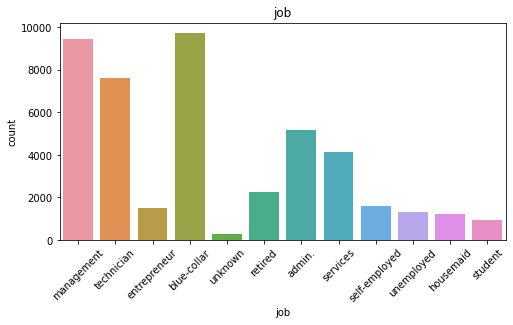

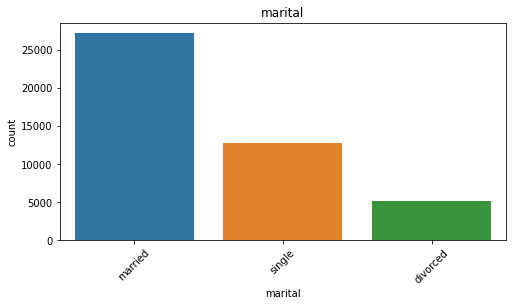

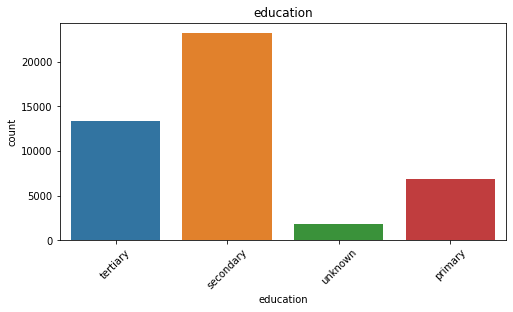

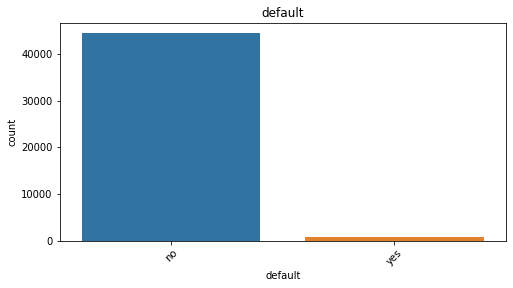

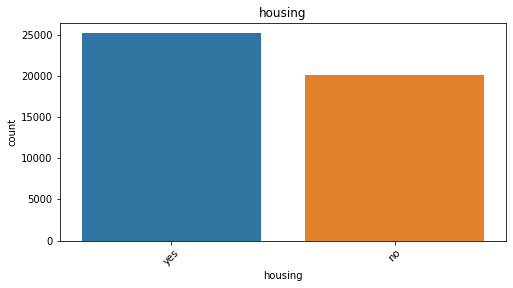

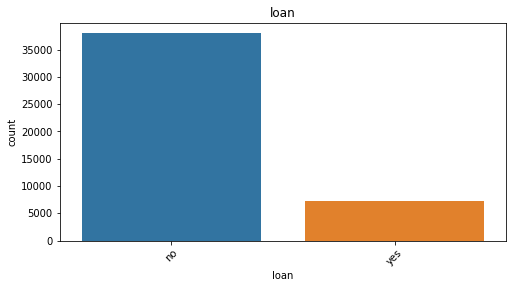

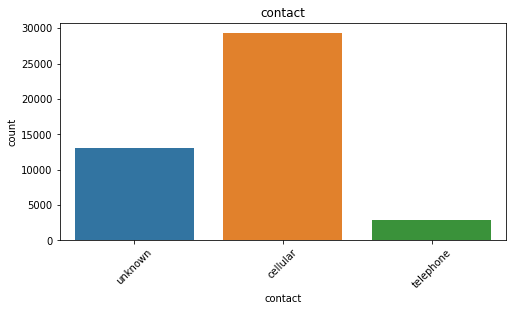

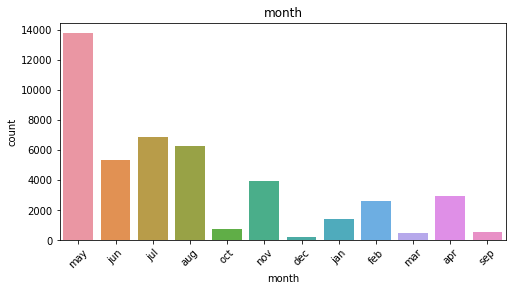

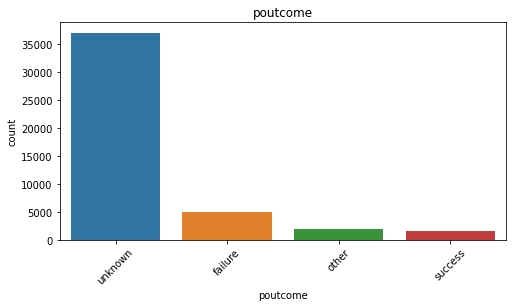

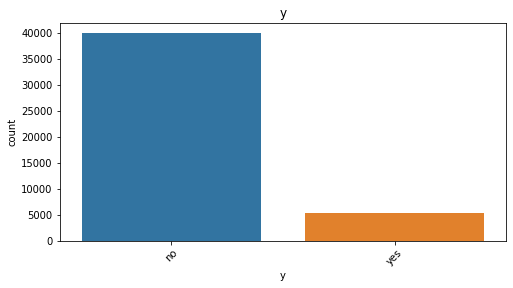

In [ ]:
categorical = bank_full.select_dtypes(include=['object']).columns.values   #storing categorical column values in "categorical"

for col in categorical:                                                    #using for loop to plot the graph for each categorical value
    plt.figure(figsize=(8,4))                                              # setting the figure size 
    sns.countplot(x=bank_full[col], data=bank_full)                        #plotting countplot with categorical values on X-Axis
    plt.title(col)                                                         #column name is given as the title
    plt.xticks(rotation=45)                                                #rotating the x lables to 45 degree
    plt.show()

From the above plots we can observe that:

1. Job : Blue-collar customers are maximum and the least are the "Unknown" which doesn't give any meaning, Hence we can consider students as the least customers.we have very less unknown values in the job column.

2. Marital :  Maximum number of customers are married then comes single followed by divorced.

3. Education : Maximum number of customers have done their secondary education and minimum number of customers have done primary education. Not considering unknown values as it doesn't provide any meaning.

4. Default : Maximum customers do not have credit card as default 

5. Housing : Maximum of the customers have house loans and more than half the customers do not have housing loans.

6. Loan  : Maximum customers do not have personal loan

7. Contact : Maximum customers have cellular contact number and the least are telephone numbers.

8. month : Last contact month is may and the least is december

9. poutcome :  There are maximum unknown values and least success which shows the sales are poor.

10. y : Maximum customers haven't subscribed to term deposit.

#Bivarient Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


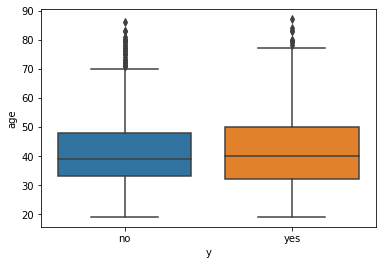

In [ ]:
sns.boxplot(bank['y'],bank['age']) #plotting box plot btw zy and age
plt.show()

In the above graph we can see that there are few outliers

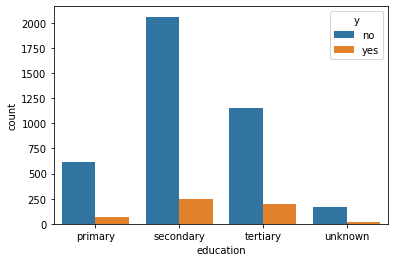

In [ ]:
sns.countplot(x='education',hue='y',data=bank) #plotting count plot on education with hue as y

Maximum of secodary education customers have both subscribed and not subscribed to the term deposit.

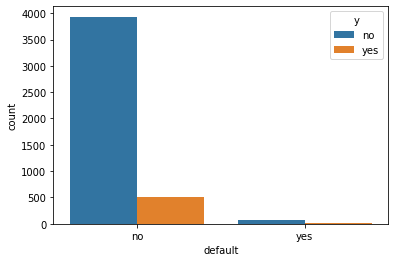

In [ ]:
sns.countplot(x='default',hue='y',data=bank)    #plotting count plot on default with hue as y

Customers who do not have credit in default are the highest customers who have not subscribed to the term deposit.

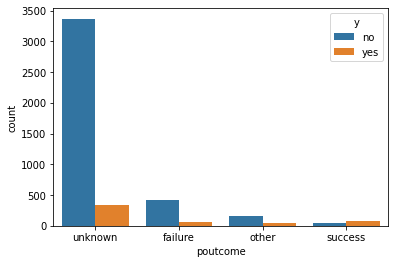

In [ ]:
sns.countplot(x='poutcome',hue='y',data=bank) #plotting count plot on poutcome with hue as y


Customers who have not subscribed for term deposit are Uknown previous coutcomes of campaign 

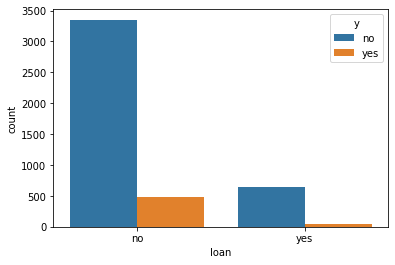

In [ ]:
sns.countplot(x='loan',hue='y',data=bank)  #plotting count plot on loan with hue as y



Most of the customers have not taken loan and those customers are the maximum people who did not subscribe to term deposit.

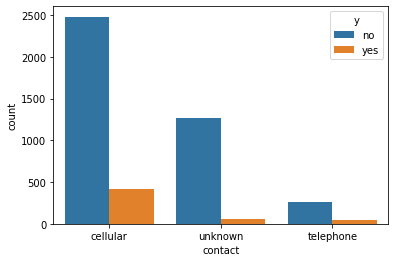

In [ ]:
sns.countplot(x='contact', hue='y',data=bank) #plotting count plot on loan with hue as y

The cellular contact customers are higher and are the highest in non subscribers and subscribers of term deposit.

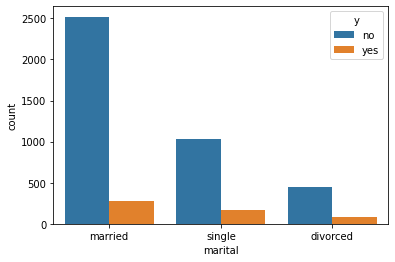

In [ ]:
sns.countplot(x='marital',hue='y',data=bank)


Peolpe who have completed their seconday education comes under this category.

#Data processing 

We can convert the categorical columns to numerical as they have binary values.

In [ ]:
# Lets start with converting default column
 
def default_to_num(df):            #Creating function to convert default to numeric value
    if df['default'] == 'no':      # Using if statement  to return 0 if the default value is no
        return 0
    elif df['default'] == 'yes':   # Using if statement to return 1 if the default value is yes
        return 1
    else:
        return 99                  #if the value is anything else apart from no or yes

In [ ]:
bank_full['default_num'] = bank_full.apply(default_to_num, axis=1)  #Calling the default_to_num function on axis 1(column) 
#and storing it in bank_full['default_num']
bank['default_num'] = bank.apply(default_to_num, axis=1) 
#Calling the default_to_num function on axis 1(column) and storing it in bank['default_num']

In [ ]:
#Value count before converting to numerical
bank_full['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
#Value count after converting to numerical
bank_full['default_num'].value_counts()

0    44396
1      815
Name: default_num, dtype: int64

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [ ]:
#Value count before converting to numerical
bank['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [ ]:
#Value count after converting to numerical
bank['default_num'].value_counts()

0    4445
1      76
Name: default_num, dtype: int64

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0


In [ ]:
# converting housing column to numerical

def housing_to_num(df):  #Creating  housing_to_num function to convert default to numeric value
    if df['housing'] == 'no':  # Using if statement  to return 0 if the housing value is no
        return 0
    if df['housing'] == 'yes':  # Using if statement to return 1 if the default value is yes
        return 1
    else:
        return 99               #if the value is anything else apart from no or yes

In [ ]:
#Calling the housing_to_num function on axis 1(column) and storing it in bank_full['housing_num']
bank_full['housing_num'] = bank_full.apply(housing_to_num, axis=1)
#Calling the housing_to_num function on axis 1(column) and storing it in bank['housing_num']
bank['housing_num'] = bank.apply(housing_to_num, axis=1)

In [ ]:
# before changing housing in bank_full

bank_full['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
# after changing housing in bank_full

bank_full['housing_num'].value_counts()

1    25130
0    20081
Name: housing_num, dtype: int64

In [ ]:
# before changing housing in bank

bank['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [ ]:
# after changing housing in bank

bank['housing_num'].value_counts()

1    2559
0    1962
Name: housing_num, dtype: int64

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0


In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,1
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,0


In [ ]:
#converting loan column to numerical 

def loan_to_num(df):          #Creating  loan_to_num function to convert default to numeric value
    if df['loan'] == 'no':     # Using if statement  to return 0 if the loan value is no
        return 0
    if df['loan'] == 'yes':    # Using if statement  to return 1 if the loan value is yes
        return 1
    else:
        return 99             #if the value is anything else apart from no or yes

In [ ]:
#Calling the loan_to_num function on axis 1(column) and storing it in bank_full['loan_num']
bank_full['loan_num'] = bank_full.apply(loan_to_num, axis=1)
#Calling the loan_to_num function on axis 1(column) and storing it in bank['loan_num']
bank['loan_num'] = bank.apply(loan_to_num, axis=1)

In [ ]:
# before changing loan in bank_full

bank_full['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
# after changing loan in bank_full

bank_full['loan_num'].value_counts()

0    37967
1     7244
Name: loan_num, dtype: int64

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num,loan_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,0


In [ ]:
# before changing loan in bank

bank['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [ ]:
# after changing loan in bank_full

bank['loan_num'].value_counts()

0    3830
1     691
Name: loan_num, dtype: int64

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num,loan_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,1,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1,1,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,0,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,0,0


In [ ]:
# Converting y column to numerical 

def y_to_num(df):                      #Creating  y_to_num function to convert default to numeric value
    if df['y'] == 'no':                # Using if statement  to return 0 if the y value is no
        return 0
    if df['y'] == 'yes':               # Using if statement  to return 1 if the y value is yes
        return 1
    else:
        return 99                      #if the value is anything else apart from no or yes returns 99

In [ ]:
#Calling the y_to_num function on axis 1(column) and storing it in bank_full['y_num']

bank_full['y_num'] = bank_full.apply(y_to_num, axis=1)

#Calling the y_to_num function on axis 1(column) and storing it in bank['y_num']

bank['y_num'] = bank.apply(y_to_num, axis=1)

In [ ]:
# before changing y in bank_full

bank_full['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# after changing y in bank_full

bank_full['y_num'].value_counts()


0    39922
1     5289
Name: y_num, dtype: int64

In [ ]:
# before changing y in bank

bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
# After changing y in bank

bank['y_num'].value_counts()

0    4000
1     521
Name: y_num, dtype: int64

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,default_num,housing_num,loan_num,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,yes,0,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,yes,0,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,yes,0,0,0,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,unknown,no,0,0,0,0


#Drop Columns 


In the data frame the day and month column is not giving us any usefull information. The day and month are given without yearand the data looks biased. Hence, dropping the two columns to make the dataset much effective.

In [ ]:
bank_full['month'].value_counts()   #counting values of each month in bank_full dataset

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
bank['month'].value_counts()    #counting values of each month in bank dataset

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [ ]:
bank_full = bank_full.drop(['day','month','pdays'], axis=1)    #using drop keyword to drop day and month column and assigning it back to bank_full

In [ ]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,default_num,housing_num,loan_num,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,0,unknown,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,0,unknown,yes,0,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,0,unknown,yes,0,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,3,success,yes,0,0,0,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,0,unknown,no,0,0,0,0


In [ ]:
bank = bank.drop(['day','month','pdays'], axis=1)  #using drop keyword to drop pdays, day and month column and assigning it back to bank

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,default_num,housing_num,loan_num,y_num
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,0,unknown,no,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,4,failure,no,0,1,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,1,failure,no,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,0,unknown,no,0,1,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,0,unknown,no,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,0,unknown,no,0,1,0,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,0,unknown,no,1,1,1,0
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,0,unknown,no,0,0,0,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,3,other,no,0,0,0,0


Now the enitre data cleaning is done. we can now combine both the dataframes as directed in the project.

In [ ]:
df = pd.concat([bank_full,bank])   #using concat from pandas to combine the datasets

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,default_num,housing_num,loan_num,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,0,unknown,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,329,5,0,unknown,no,0,1,0,0
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,0,unknown,no,1,1,1,0
49729,57,technician,married,secondary,no,295,no,no,cellular,151,11,0,unknown,no,0,0,0,0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,3,other,no,0,0,0,0


In [ ]:
df.shape

(49732, 18)

In [ ]:
bank_full.shape

(45211, 18)

In [ ]:
bank.shape

(4521, 18)

We can see that the rows and columns are combined perfectly as per the above.

#Feature selection

In [ ]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'previous',
       'poutcome', 'y', 'default_num', 'housing_num', 'loan_num', 'y_num'],
      dtype=object)

In [ ]:
#dividing the columns into categorical and numerical to perform further tasks
cat = df[['job', 'marital', 'education', 'poutcome', 'y_num']]
num = df[['age', 'balance', 'duration', 'campaign', 'previous', 'default_num',
             'housing_num', 'loan_num', 'y_num']]

In [ ]:
#checking the number of rows and columns of the combined dataset
print('Categorical Data: ', cat.shape)
print('Numerical Data: ', num.shape)

Categorical Data:  (49732, 5)
Numerical Data:  (49732, 9)


## Feature Selection 1: Numerical Input to Categorical Output

Method: Chi-squared Test



In [ ]:
cat.head() #.head gives first 5 values from the dataset

,job,marital,education,poutcome,y_num
0,management,married,tertiary,unknown,0
1,technician,single,secondary,unknown,0
2,entrepreneur,married,secondary,unknown,0
3,blue-collar,married,unknown,unknown,0
4,unknown,single,unknown,unknown,0


In [ ]:
category = cat.columns[:-1]  #assigning all the columns except y_num to category
x_cat = cat[category]        # category is assigned to x_cat
y_cat = cat['y_num']         #y_num assigned to y_cat

x_cat.head()      #checking dataset in x_cat preparing for the encoding 


,job,marital,education,poutcome
0,management,married,tertiary,unknown
1,technician,single,secondary,unknown
2,entrepreneur,married,secondary,unknown
3,blue-collar,married,unknown,unknown
4,unknown,single,unknown,unknown


In [ ]:
# we will now use Label encoder to transform categorical data into numerical data

le = LabelEncoder()   #Assigning label encoder to le

x_cat['job'] = le.fit_transform(x_cat['job'])  #calling label encoder on job column of x_cat
x_cat['marital'] = le.fit_transform(x_cat['marital'])  #calling label encoder on marital column of x_cat
x_cat['education'] = le.fit_transform(x_cat['education'])  #calling label encoder on education column of x_cat
x_cat['poutcome'] = le.fit_transform(x_cat['poutcome'])   #calling label encoder on poutcome column of x_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
x_cat.head(15) #accessing first 15 values from the dataset 

,job,marital,education,poutcome
0,4,1,2,3
1,9,2,1,3
2,2,1,1,3
3,1,1,3,3
4,11,2,3,3
5,4,1,2,3
6,4,2,2,3
7,2,0,2,3
8,5,1,0,3
9,9,2,1,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


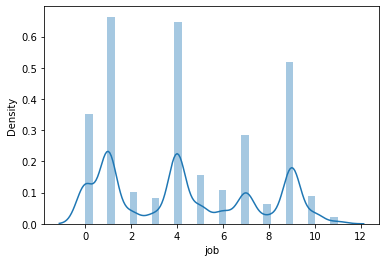

In [ ]:
sns.distplot(x_cat['job'])   #distplot to analyse skewness of job

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


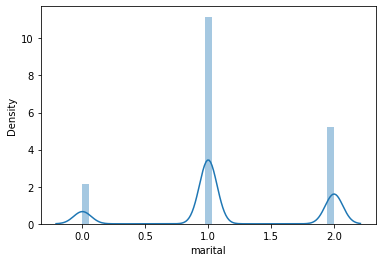

In [ ]:
sns.distplot(x_cat['marital'])   #distplot to analyse skewness of marital

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


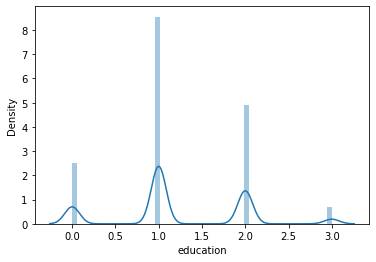

In [ ]:
sns.distplot(x_cat['education'])   #distplot to analyse skewness of education

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


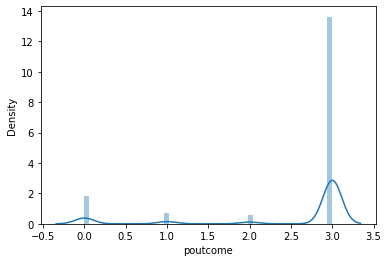

In [ ]:
sns.distplot(x_cat['poutcome'])   #distplot to analyse skewness of poutcome

In [ ]:
x_cat.skew()    #using .skew() to find the skewness values

job          0.260065
marital     -0.099611
education    0.196265
poutcome    -1.972654
dtype: float64

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 

A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.


Here, poutcome is highly skewed and rest are fairly symmentrical.

In [ ]:
# Data Normalization

x_catnorm = MinMaxScaler().fit_transform(x_cat)  #Using min max scalling to normalize the categorical data

In [ ]:
x_catnorm

array([[0.36363636, 0.5       , 0.66666667, 1.        ],
       [0.81818182, 1.        , 0.33333333, 1.        ],
       [0.18181818, 0.5       , 0.33333333, 1.        ],
       ...,
       [0.81818182, 0.5       , 0.33333333, 1.        ],
       [0.09090909, 0.5       , 0.33333333, 0.33333333],
       [0.18181818, 1.        , 0.66666667, 0.33333333]])

In [ ]:
chi_score, pvalue = chi2(x_catnorm, y_cat)  #finding pvalue in Chi-squared Test


In [ ]:
for i in range(len(category)):
    print(category[i], ': ', pvalue[i])   #printing the pvalue for each column

job :  3.4509320147400524e-05
marital :  0.00014255783056957478
education :  2.405736813323309e-08
poutcome :  4.6188093661887243e-10


All categorical features are significant variables because the P-Value < 0.05.



## Feature Selection 2: Categorical Input to Categorical Output

Method : Correlation Test and ANOVA

In [ ]:
num.head(10) #accessing first 15 values from the dataset 

,age,balance,duration,campaign,previous,default_num,housing_num,loan_num,y_num
0,58,2143,261,1,0,0,1,0,0
1,44,29,151,1,0,0,1,0,0
2,33,2,76,1,0,0,1,1,0
3,47,1506,92,1,0,0,1,0,0
4,33,1,198,1,0,0,0,0,0
5,35,231,139,1,0,0,1,0,0
6,28,447,217,1,0,0,1,1,0
7,42,2,380,1,0,1,1,0,0
8,58,121,50,1,0,0,1,0,0
9,43,593,55,1,0,0,1,0,0


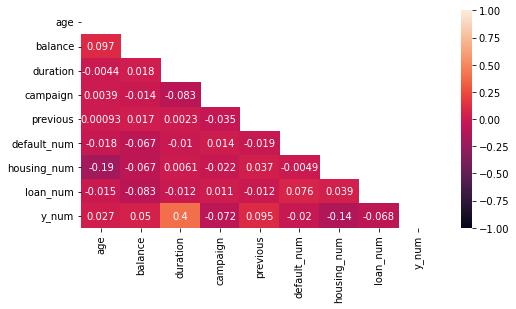

In [ ]:
# Correlation Test

plt.figure(figsize=(8,4))   #setting the plot size
mask = np.triu(np.ones_like(num.corr(), dtype=bool))   
#Mask — takes a boolean array or a dataframe as an argument; when defined, cells become invisible for values where the mask is True 
#np.triu() numpy function to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0. 
#np.ones_like() function will change all the isolated values into 1.
sns.heatmap(num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)  #plotting heat map with annotation true
plt.show()

In [ ]:
num.skew()   #using .skew() to find the skewness values

age             0.686033
balance         8.204429
duration        3.109530
campaign        4.884266
previous       40.783648
default_num     7.268932
housing_num    -0.228541
loan_num        1.859429
y_num           2.385864
dtype: float64

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

A value between 0.5 and 1 or -0.5 and -1 is moderately skewed.

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

Here, we can see that most of the attributes are highly skewed and rest are fairly symmentrical.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


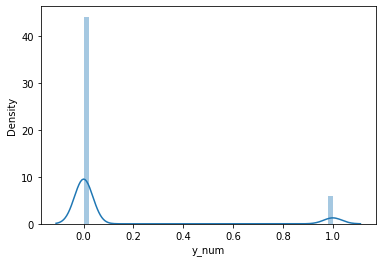

In [ ]:
sns.distplot(num['y_num']) 

In [ ]:
numeric = num.columns[:-1]  #storing all the values except y_num into numeric
x_num = num[numeric]        # x_num stores the value of numeric   
y_num = num['y_num']        #y_num stores the value of y

In [ ]:
x_num.head(10)


,age,balance,duration,campaign,previous,default_num,housing_num,loan_num
0,58,2143,261,1,0,0,1,0
1,44,29,151,1,0,0,1,0
2,33,2,76,1,0,0,1,1
3,47,1506,92,1,0,0,1,0
4,33,1,198,1,0,0,0,0
5,35,231,139,1,0,0,1,0
6,28,447,217,1,0,0,1,1
7,42,2,380,1,0,1,1,0
8,58,121,50,1,0,0,1,0
9,43,593,55,1,0,0,1,0


In [ ]:
# Data Normalization

x_numnorm = MinMaxScaler().fit_transform(x_num)   #Data normalization with MinMax scalling on x_num

In [ ]:
x_numnorm  #normalized data

array([[0.51948052, 0.09225936, 0.05307035, ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.07306666, 0.03070354, ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.07282153, 0.01545344, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.50649351, 0.07548163, 0.03070354, ..., 0.        , 0.        ,
        0.        ],
       [0.12987013, 0.08312603, 0.02623017, ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.08311695, 0.07015047, ..., 0.        , 1.        ,
        1.        ]])

In [ ]:
# ANOVA

f_score, p_value = f_classif(x_numnorm, y_num)  #finding the pvalue of ANOVA

In [ ]:
#printing pvalues using for loop
for i in range(len(numeric)):
    print(numeric[i], ': ', p_value[i]) 

age :  1.871017746894849e-09
balance :  1.3849084411395935e-28
duration :  0.0
campaign :  2.7190929739200655e-58
previous :  3.727063034392012e-99
default_num :  5.746585643565281e-06
housing_num :  4.048787551292794e-204
loan_num :  1.268800090611499e-52


All numerical features are significant variables because the P-Value < 0.05.



In [ ]:
df.columns.values      

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'previous',
       'poutcome', 'y', 'default_num', 'housing_num', 'loan_num', 'y_num'],
      dtype=object)

In [ ]:
# Rearrange the columns for easiness

bank_data = df[['marital',  'poutcome', 'job', 'education', 'age', 'balance',
                    'duration', 'campaign', 'previous', 'default_num',
                    'housing_num', 'loan_num', 'y_num']]

bank_data.head()

,marital,poutcome,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num,y_num
0,married,unknown,management,tertiary,58,2143,261,1,0,0,1,0,0
1,single,unknown,technician,secondary,44,29,151,1,0,0,1,0,0
2,married,unknown,entrepreneur,secondary,33,2,76,1,0,0,1,1,0
3,married,unknown,blue-collar,unknown,47,1506,92,1,0,0,1,0,0
4,single,unknown,unknown,unknown,33,1,198,1,0,0,0,0,0


We need to transform the categorical features. There are two ways of doing this which are Label Encoding and One Hot Encoding.

job : We will use Label Encoding because there are a lot of categories.

education : We will use Label Encoding because it is an ordinal categorical feature.

marital : We will use One Hot Encoding.

poutcome : We will use One Hot Encoding.

In [ ]:
# Label Encoding

bank_data['job'] = le.fit_transform(bank_data['job'])  #Label encoding on job column
bank_data['education'] = le.fit_transform(bank_data['education'])  #Label encoding on education column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
bank_data.head()

,marital,poutcome,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num,y_num
0,married,unknown,4,2,58,2143,261,1,0,0,1,0,0
1,single,unknown,9,1,44,29,151,1,0,0,1,0,0
2,married,unknown,2,1,33,2,76,1,0,0,1,1,0
3,married,unknown,1,3,47,1506,92,1,0,0,1,0,0
4,single,unknown,11,3,33,1,198,1,0,0,0,0,0


In [ ]:
#to perfor further encoding we have to seperate the data accordingly
features = bank_data.columns[0:-1]   # This is going to have all the columns except y_num
features_onehot = bank_data.columns[0:2] #we have to perform one-hot encoding on marital and poutcome which will be saved in features_onehot
features_num = bank_data.columns[2:-1]  #Numerical data is stored in features_num

X_bank = bank_data[features]      #Assigning features to X_bank
X_bank_onehot = bank_data[features_onehot]  #Assigning features_onehot to X_bank_onehot
X_bank_num = bank_data[features_num]         #Assigning features_num to X_bank_num

In [ ]:
X_bank

,marital,poutcome,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num
0,married,unknown,4,2,58,2143,261,1,0,0,1,0
1,single,unknown,9,1,44,29,151,1,0,0,1,0
2,married,unknown,2,1,33,2,76,1,0,0,1,1
3,married,unknown,1,3,47,1506,92,1,0,0,1,0
4,single,unknown,11,3,33,1,198,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49727,married,unknown,7,1,33,-333,329,5,0,0,1,0
49728,married,unknown,6,2,57,-3313,153,1,0,1,1,1
49729,married,unknown,9,1,57,295,151,11,0,0,0,0
49730,married,other,1,1,28,1137,129,4,3,0,0,0


In [ ]:
X_bank_onehot

,marital,poutcome
0,married,unknown
1,single,unknown
2,married,unknown
3,married,unknown
4,single,unknown
...,...,...
49727,married,unknown
49728,married,unknown
49729,married,unknown
49730,married,other


In [ ]:
X_bank_num

,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num
0,4,2,58,2143,261,1,0,0,1,0
1,9,1,44,29,151,1,0,0,1,0
2,2,1,33,2,76,1,0,0,1,1
3,1,3,47,1506,92,1,0,0,1,0
4,11,3,33,1,198,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
49727,7,1,33,-333,329,5,0,0,1,0
49728,6,2,57,-3313,153,1,0,1,1,1
49729,9,1,57,295,151,11,0,0,0,0
49730,1,1,28,1137,129,4,3,0,0,0


In [ ]:
y_bank = bank_data['y_num'] #Assigning y_num to y_bank
y_bank.value_counts()    #counting the values of y_bank

0    43922
1     5810
Name: y_num, dtype: int64

In [ ]:
# One Hot Encoding
X_bank_onehot = pd.get_dummies(X_bank_onehot,columns = features_onehot) 

X_bank_onehot

,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
49727,0,1,0,0,0,0,1
49728,0,1,0,0,0,0,1
49729,0,1,0,0,0,0,1
49730,0,1,0,0,1,0,0


In [ ]:
# Standardize numerical data

scaler = StandardScaler()
X_bank_num = pd.DataFrame(scaler.fit_transform(X_bank_num))
X_bank_num

,0,1,2,3,4,5,6,7,8,9
0,-0.105852,1.035478,1.605529,0.254880,0.008962,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
1,1.422676,-0.301327,0.286628,-0.440154,-0.417824,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
2,-0.717264,-0.301327,-0.749651,-0.449031,-0.708814,-0.570030,-0.255849,-0.135066,0.892240,2.295087
3,-1.022970,2.372282,0.569250,0.045450,-0.646736,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
4,2.034088,2.372282,-0.749651,-0.449359,-0.235470,-0.570030,-0.255849,-0.135066,-1.120775,-0.435713
...,...,...,...,...,...,...,...,...,...,...
49727,0.811265,-0.301327,-0.749651,-0.559171,0.272793,0.720691,-0.255849,-0.135066,0.892240,-0.435713
49728,0.505559,1.035478,1.511321,-1.538925,-0.410064,-0.570030,-0.255849,7.403779,0.892240,2.295087
49729,1.422676,-0.301327,1.511321,-0.352699,-0.417824,2.656772,-0.255849,-0.135066,-1.120775,-0.435713
49730,-1.022970,-0.301327,-1.220687,-0.075869,-0.503181,0.398010,1.074637,-0.135066,-1.120775,-0.435713


In [ ]:
X_bank_num.columns = features_num  #Assigning the column names to numerical values 
X_bank_num

,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num
0,-0.105852,1.035478,1.605529,0.254880,0.008962,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
1,1.422676,-0.301327,0.286628,-0.440154,-0.417824,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
2,-0.717264,-0.301327,-0.749651,-0.449031,-0.708814,-0.570030,-0.255849,-0.135066,0.892240,2.295087
3,-1.022970,2.372282,0.569250,0.045450,-0.646736,-0.570030,-0.255849,-0.135066,0.892240,-0.435713
4,2.034088,2.372282,-0.749651,-0.449359,-0.235470,-0.570030,-0.255849,-0.135066,-1.120775,-0.435713
...,...,...,...,...,...,...,...,...,...,...
49727,0.811265,-0.301327,-0.749651,-0.559171,0.272793,0.720691,-0.255849,-0.135066,0.892240,-0.435713
49728,0.505559,1.035478,1.511321,-1.538925,-0.410064,-0.570030,-0.255849,7.403779,0.892240,2.295087
49729,1.422676,-0.301327,1.511321,-0.352699,-0.417824,2.656772,-0.255849,-0.135066,-1.120775,-0.435713
49730,-1.022970,-0.301327,-1.220687,-0.075869,-0.503181,0.398010,1.074637,-0.135066,-1.120775,-0.435713


In [ ]:
X_bank_onehot

,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
49727,0,1,0,0,0,0,1
49728,0,1,0,0,0,0,1
49729,0,1,0,0,0,0,1
49730,0,1,0,0,1,0,0


In [ ]:
X_bank = pd.concat([X_bank_onehot, X_bank_num], axis=1) #concating one-hot encoded data with numerical data

X_bank.head()

,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job,education,age,balance,duration,campaign,previous,default_num,housing_num,loan_num
0,0,1,0,0,0,0,1,-0.105852,1.035478,1.605529,0.254880,0.008962,-0.57003,-0.255849,-0.135066,0.892240,-0.435713
1,0,0,1,0,0,0,1,1.422676,-0.301327,0.286628,-0.440154,-0.417824,-0.57003,-0.255849,-0.135066,0.892240,-0.435713
2,0,1,0,0,0,0,1,-0.717264,-0.301327,-0.749651,-0.449031,-0.708814,-0.57003,-0.255849,-0.135066,0.892240,2.295087
3,0,1,0,0,0,0,1,-1.022970,2.372282,0.569250,0.045450,-0.646736,-0.57003,-0.255849,-0.135066,0.892240,-0.435713
4,0,0,1,0,0,0,1,2.034088,2.372282,-0.749651,-0.449359,-0.235470,-0.57003,-0.255849,-0.135066,-1.120775,-0.435713


In [ ]:
X_bank.shape #checking the resultant rows and columns

(49732, 17)

In [ ]:
y_bank.shape  #cheking the y_bank rows and columns

(49732,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_bank,y_bank,test_size = .30,random_state = 100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34812, 17), (14920, 17), (34812,), (14920,))

In [ ]:
from sklearn.linear_model import LogisticRegression  #importing logisticRegression library  
from sklearn.svm import SVC   #importing support vector classifier library
from sklearn.neighbors import KNeighborsClassifier  # importing KNeighborsClassifier library
from sklearn.tree import DecisionTreeClassifier  #importing DecisionTreeClassifier library
from sklearn.ensemble import RandomForestClassifier  # importing RandomForestClassifier library 
from sklearn.naive_bayes import GaussianNB        #importing GaussianNB library 

In [ ]:
#appending all the models to models list
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())

In [ ]:
from sklearn import metrics #importing metrics to mesure classifiction performance
from sklearn.metrics import  classification_report #importing classification_report to measure the quality 
from sklearn.metrics import confusion_matrix  #importing confusion_matrix for visual prediction 

In [ ]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 
              'Naive Bayes']
acc_list = []   # Creating empty list to append accuracy score
auc_list = []   #Creating empty list to append accuracy 
cm_list = []                  #creating empty list to append confusion matrix
mse_list = []                #Creating empty list to append mean square list 
precision_score_list = []    #Creating empty list to append precision score
recall_score_list = []       #creating empty list to append recall score

for model in models:
    model.fit(x_train, y_train)    #a measure of how well a machine learning model generalizes to similar data is done here
    y_pred = model.predict(x_test)  #enables us to predict the labels of the data values on the basis of the trained model.
    acc_list.append(metrics.accuracy_score(y_test, y_pred)) #calculationg accuracy score
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)  #false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.
    auc_list.append(round(metrics.auc(fpr, tpr),2)) #metrics accuracy is calculated
    cm_list.append(confusion_matrix(y_test, y_pred))  #performing confusion metrix
    mse_list.append(mean_squared_error(y_test, y_pred)) #performing mean square error
    precision_score_list.append(precision_score(y_test, y_pred)) #calculating precision score
    recall_score_list.append(recall_score(y_test, y_pred))   #calculating recall score 
    

In [ ]:
cm_list

[array([[12771,   329],
        [ 1268,   552]]), array([[12835,   265],
        [ 1322,   498]]), array([[12618,   482],
        [ 1178,   642]]), array([[12094,  1006],
        [  932,   888]]), array([[12728,   372],
        [ 1038,   782]]), array([[12110,   990],
        [ 1009,   811]])]

In [ ]:
# Printing the Accuracy, AUC ,mse,precision and recall
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list,'mse':mse_list,'precision':precision_score_list,'recall':recall_score_list})
result_df

,Model,Accuracy,AUC,mse,precision,recall
0,Logistic Regression,0.892962,0.64,0.107038,0.626561,0.303297
1,SVM,0.893633,0.63,0.106367,0.652687,0.273626
2,KNN,0.888740,0.66,0.111260,0.571174,0.352747
3,Decision Tree,0.870107,0.71,0.129893,0.468849,0.487912
4,Random Forest,0.905496,0.70,0.094504,0.677643,0.429670
5,Naive Bayes,0.866019,0.69,0.133981,0.450305,0.445604


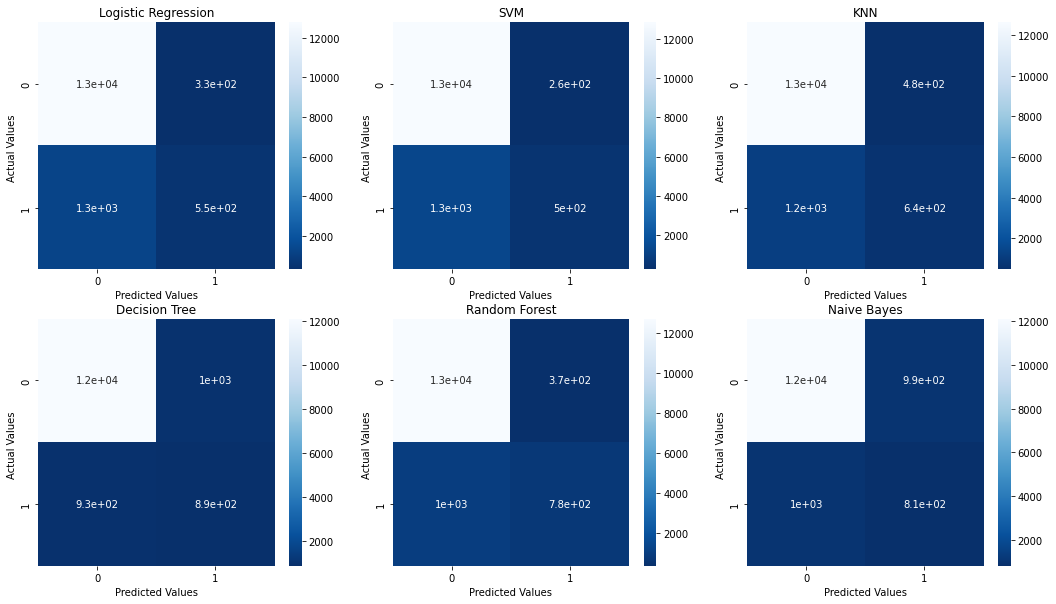

In [ ]:
# Plot confusion matrix
fig = plt.figure(figsize = (18,10)) # plotting the figure size
for i in range(len(cm_list)):       # Using for loop to plot different models
    cm = cm_list[i]                 # plotting the list of confusion matrix
    model = model_list[i]           # Plotting all the models
    sub = fig.add_subplot(2, 3, i+1).set_title(model)           #setting the title and subplots 
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')     # plotting heat map
    cm_plot.set_xlabel('Predicted Values')                      #naming x label as Predicted values
    cm_plot.set_ylabel('Actual Values ')                        #naming y label as Actual Values

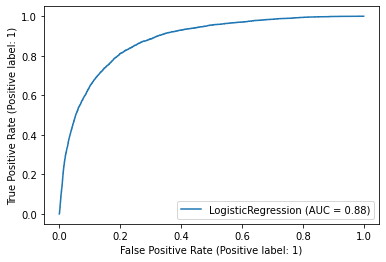

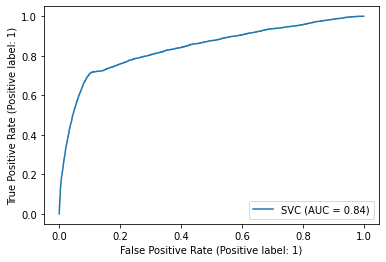

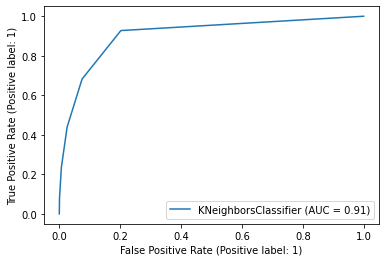

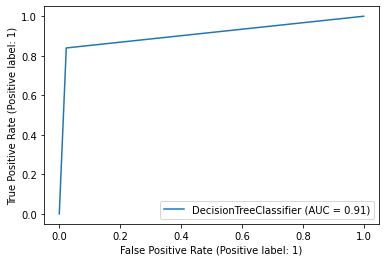

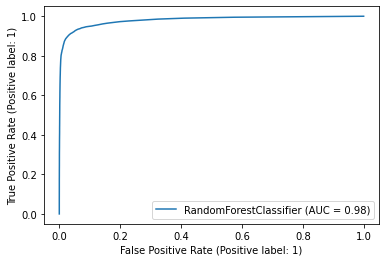

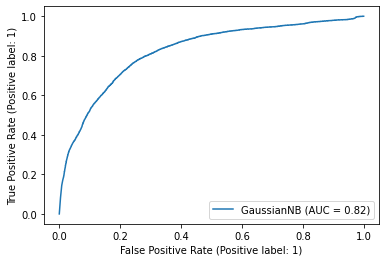

In [ ]:
# Plotting  ROC Curve to predict the best model 
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

for model in models:
    RocCurveDisplay.from_estimator(model, X_bank, y_bank)  

#Conclusion

Best model is Random Forest Classifiers with accuracy score 98%.

1. Mean age should be 41 years old
2. Mode of contact should be cellular and telephone
3. Peolple who do not have any type housing loan or default are best     to     target.
4. Peole who are in management are Blue collar best to target.
